In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#데이터들의 x , y 값
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [3]:
df.head()

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


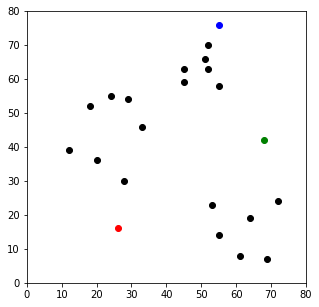

In [4]:
np.random.seed(200)
k = 3 #cluster 개수
centroids = { #centroids init
    i: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [5]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt( #거리 계산
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()] #테이블 만들기
    df['가까운 centroids'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['가까운 centroids'] = df['가까운 centroids'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['가까운 centroids'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

    x   y  distance_from_0  distance_from_1  distance_from_2  가까운 centroids  \
0  12  39        26.925824        56.080300        56.727418              0   
1  20  36        20.880613        48.373546        53.150729              0   
2  28  30        14.142136        41.761226        53.338541              0   
3  18  52        36.878178        50.990195        44.102154              0   
4  29  54        38.118237        40.804412        34.058773              2   

  color  
0     r  
1     r  
2     r  
3     r  
4     b  


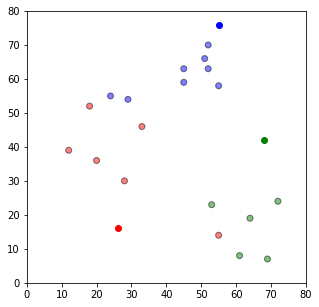

In [6]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [7]:
def update(k):
    for i in centroids.keys(): #업데이트
        centroids[i][0] = np.mean(df[df['가까운 centroids'] == i]['x']) #numpy mean : 평균 구하기 위해
        centroids[i][1] = np.mean(df[df['가까운 centroids'] == i]['y'])
    return k

centroids = update(centroids)

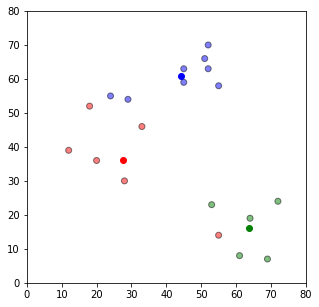

In [8]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

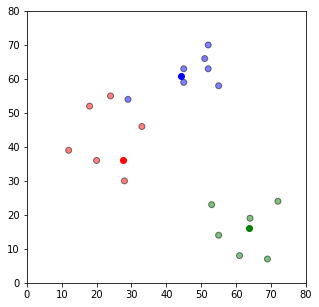

In [9]:
df = assignment(df,centroids) # 다시 assignment
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [10]:
import copy
while True:
    close_centroid = df['가까운 centroids'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if close_centroid.equals(df['가까운 centroids']): #더 이상 assignment 할 것이 없으면
        break #k-means 종료

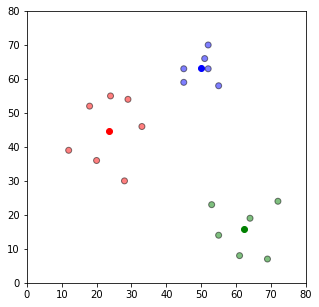

In [11]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()